# Classification: Performance of the Naive Bayes algorithm on the given data set
Run theNaive Bayes tool on the resulting version of **`train_gr_smpl`**. To be able to do this in Weka, you may
need to apply several Weka “Filters”. Explain the reason for choosing and using these filters. Once
you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes
(as given by the confusion matrix).

### Proportional k-interval discretization
 According to the course textbook Equal Frequency binning is excellent for Naive bayes.
 
 **Specifically when the number of bins is equal to the sqaure root of the number of instances.** This is called Proportional k-interval discretization

In a nutshell Naive Bayse should find the probability of each of the 10 classes given each pixel. 
We should expect 10 output values per instance we are predicting that sum to 1. With the highest probability being the best guess of the class attribute according to naive bayse.


* Preprocess (filter the data) data
    * normalize the data filter
    * Scipy / Keras maybe
    * Justify how / why 
* 

[See here for scikit learn naive bayse](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [3]:
from Scripts import helperfn
%load_ext autoreload
%autoreload 2

x, y = helperfn.get_data()
(x.shape, y.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


((9690, 2304), (9690, 1))

In [2]:
 type(x)

pandas.core.frame.DataFrame

In [3]:
x.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
2299    float64
2300    float64
2301    float64
2302    float64
2303    float64
Length: 2304, dtype: object

In [4]:
# convert to nparray, split, and randomise
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size=0.10, random_state=0)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8721, 2304), (8721, 1), (969, 2304), (969, 1))

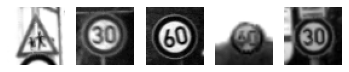

In [6]:
import matplotlib.pyplot as plt

num_images = 5

for i in range(num_images):
    row = X_train[i]
    image = row.reshape(48,48)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [9]:
#X_test[618]
import numpy as np
np.unique(res)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [4]:
from Scripts.NaiveBayse import SamNaiveBayseGaussian as nbg
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Perform Naive Bayse on random sample of full data
### Get the classifier, scores, and data used

In [5]:
classifer, scores, data = nbg.build_nbg_models()

Dataset:  -1  Has results: [0 1 2 3 4 5 6 7 8 9]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  0  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  1  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  2  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  3  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  4  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  5  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  6  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  7  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  8  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Dataset:  9  Has results: [0 1]
(7752, 2304) (1938, 2304) (7752, 1) (1938, 1)
float64
Scores for dataset:  All Classes
Trai

### Build an np.array representing the confusion matrix:

In [6]:
conf = nbg.build_confusion_matrix(classifer,data)

### Display the confusion matrix with kappa values

Kappa:  0.14104866334348043


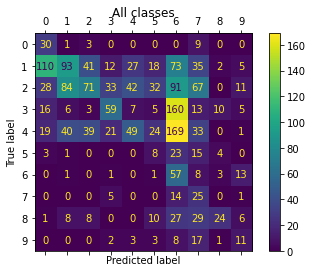

Kappa:  0.11601760420133848


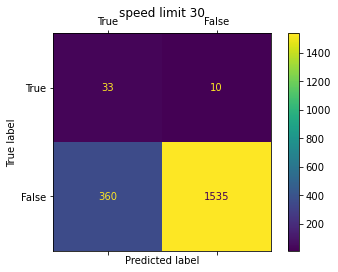

Kappa:  0.21634816989157132


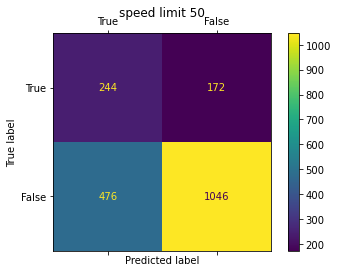

Kappa:  0.18835366196391432


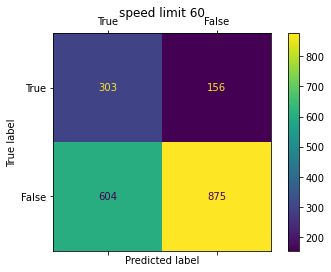

Kappa:  0.23511316938650373


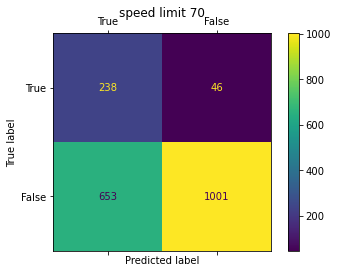

Kappa:  0.11993866691747113


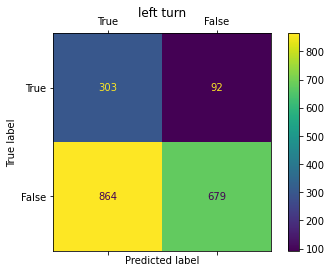

Kappa:  0.03838394073138079


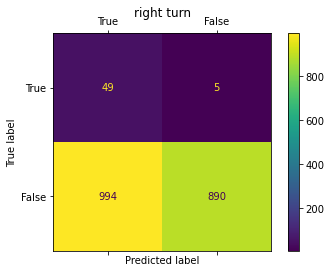

Kappa:  0.056897938496457606


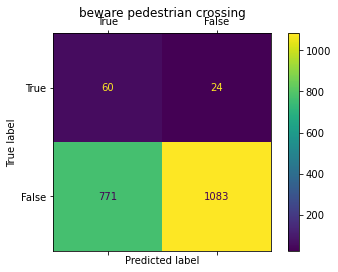

Kappa:  0.03323297516356039


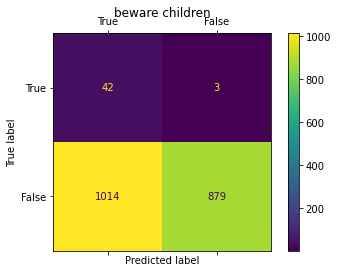

Kappa:  0.14302241003082675


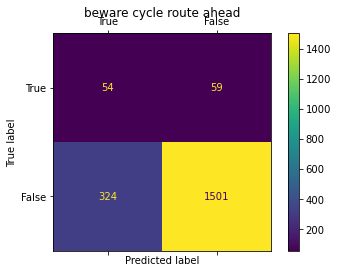

In [7]:
nbg.show_confusion_matrix(conf, kappas=nbg.kappa(conf))

## Perform Naive Bayse on datasets with a balanced class distribution

In [8]:
bal_classifer, bal_scores, bal_data = nbg.build_nbg_models(balance_classes=True)

Dataset:  -1  Has results: [0 1 2 3 4 5 6 7 8 9]
(1680, 2304) (420, 2304) (1680, 1) (420, 1)
int32
Dataset:  0  Has results: [0 1]
(336, 2304) (84, 2304) (336, 1) (84, 1)
int32
Dataset:  1  Has results: [0 1]
(3552, 2304) (888, 2304) (3552, 1) (888, 1)
int32
Dataset:  2  Has results: [0 1]
(3600, 2304) (900, 2304) (3600, 1) (900, 1)
int32
Dataset:  3  Has results: [0 1]
(2256, 2304) (564, 2304) (2256, 1) (564, 1)
int32
Dataset:  4  Has results: [0 1]
(3168, 2304) (792, 2304) (3168, 1) (792, 1)
int32
Dataset:  5  Has results: [0 1]
(336, 2304) (84, 2304) (336, 1) (84, 1)
int32
Dataset:  6  Has results: [0 1]
(576, 2304) (144, 2304) (576, 1) (144, 1)
int32
Dataset:  7  Has results: [0 1]
(384, 2304) (96, 2304) (384, 1) (96, 1)
int32
Dataset:  8  Has results: [0 1]
(864, 2304) (216, 2304) (864, 1) (216, 1)
int32
Dataset:  9  Has results: [0 1]
(432, 2304) (108, 2304) (432, 1) (108, 1)
int32
Scores for dataset:  All Classes
Training data score:  0.3613095238095238
Testing data score:  0.31

### Build confusion matrix for balanced class distribution

In [9]:
bal_conf = nbg.build_confusion_matrix(bal_classifer, bal_data)

### Display confusion matrices & their kappa values

Kappa:  0.2380462143991563


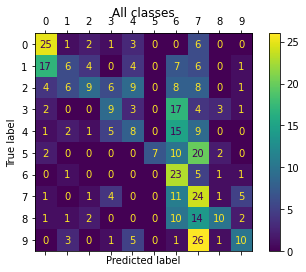

Kappa:  0.6666666666666665


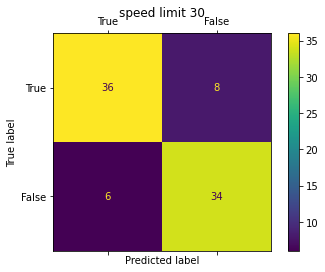

Kappa:  0.26328808538577836


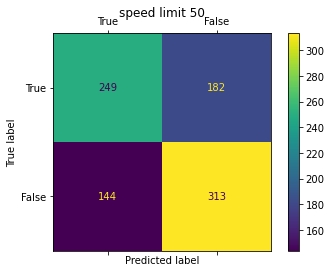

Kappa:  0.24270838474066042


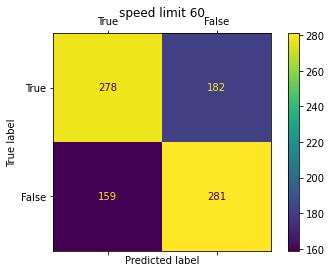

Kappa:  0.4171844102825796


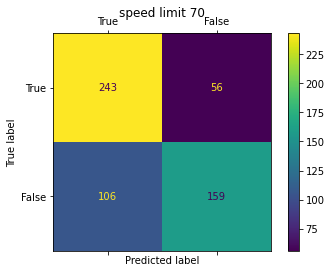

Kappa:  0.2404857986908923


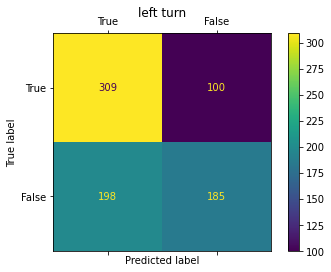

Kappa:  0.24390243902439027


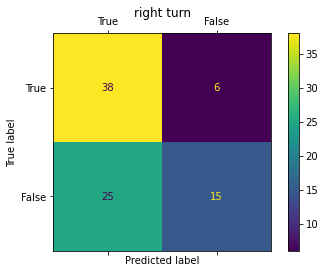

Kappa:  0.4237804878048778


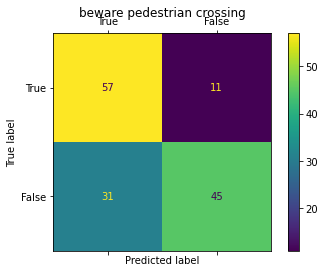

Kappa:  0.18678526048284633


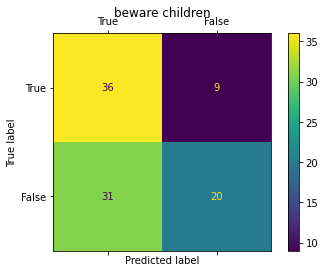

Kappa:  0.30558693196628733


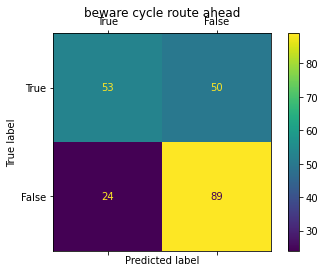

In [10]:
nbg.show_confusion_matrix(bal_conf, kappas=nbg.kappa(bal_conf))